In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy

In [3]:
def sigma_eff(nt, nd,  ndacc,sigma_ndacc):    
    epsilon=nt/(nd-ndacc)
    sigma_nt=np.sqrt(nd*epsilon*(1-epsilon))

    term_1=sigma_nt/(nd-ndacc)
    term_2=nt*sigma_ndacc/(nd-ndacc)**2
    sigma_eff=np.sqrt(term_1**2+term_2**2)
    return sigma_eff

## Geometria

In [4]:
larghezza_pla=26.7 #cm
lunghezza_pla=52.5
prodondità_pla=2.3
area_pla=larghezza_pla*lunghezza_pla
print(f"Area sovrapposizone plastici {area_pla:.2f} cm^2.")

Area sovrapposizone plastici 1401.75 cm^2.


In [5]:
np.random.uniform(0, 1) > 0.35 #efficienza con accettanza geometrica del PMT7 in prima approssimazione
# Funzione per verificare se una posizione è all'interno dei limiti geometrici
def is_inside(x, y, lunghezza,larghezza):
    return (0<= x <= lunghezza) and (0 <= y <= larghezza)

def monte_carlo_simulation(duration):
    total_events = int(duration/60 * area_pla)  # Numero totale di eventi da simulare
    events = 0

    for _ in range(total_events):
        rng = np.random.default_rng() #random seed
        if np.random.uniform(0, 1) > 0.35:
            events+=1

    return events / duration  # Rate di coincidenza

print(f"Conteggi attesi { monte_carlo_simulation(100):.2f} al secondo su ogni singolo scintillatore.")

Conteggi attesi 15.56 al secondo su ogni singolo scintillatore.


In [6]:
larghezza_bers=30 #cm 
lunghezza_bers=31 #cm per entrambi gli oggetti
profondità_bers=30 #cm per entrambi gli oggetti
area_bers=larghezza_bers*lunghezza_bers
print(f"Area sovrapposizone bersaglio {area_bers:.2f} cm^2.")

larghezza_b1=larghezza_bers/2
lunghezza_b1=lunghezza_bers/2
profondità_b1=profondità_bers/2
area_b1=larghezza_b1*lunghezza_b1
print(f"Area singoli cosi del bersaglio {area_b1:.2f} cm^2.")

Area sovrapposizone bersaglio 930.00 cm^2.
Area singoli cosi del bersaglio 232.50 cm^2.


## Angolo solido sotteso e rate atteso dello start

Quando guardo al segnale di START io sto guardando la coincidenza tra gli scintillatori sopra e l'OR del bersaglio. Considera quindi l'angolo solido sotteso dal PMT7 rispetto al bersaglio complessivo

In [7]:
# Distanze tra i PMT
distanza_7_4 = 28.9  # cm
distanza_7_5=18.5 #cm
distanza_5_4=9.4 #cm
distanza_4_3=9.4 #cm
distanza_3_2=30
distanza_4_2 = 39.4  # cm
distanza_2_b = 7  # cm
distanza_b_1=15+30

# Parametri geometrici delle lastre
larghezza_pla = 26.7  # cm
lunghezza_pla = 52.5  # cm
profondità_pla = 2.3  # cm

# Dimensioni del bersaglio (PMT sotto il sistema principale)
larghezza_bers = 30  # cm
lunghezza_bers = 31  # cm

# Dimensioni di ciascun PMT nel bersaglio
larghezza_pmt_bers = larghezza_bers / 2  # ogni PMT largo metà del sistema
lunghezza_pmt_bers = lunghezza_bers
profondità_pmt_bers=30/2

offset_x=(lunghezza_pla-lunghezza_bers)/2
offset_y=(larghezza_bers-larghezza_pla)/2

In [12]:
# Function to calculate the solid angle
def solid_angle(width, length, distance):
    """Calculate the solid angle of a rectangular target."""
    half_width = width / 2
    half_length = length / 2
    r = distance
    return 4 * np.arctan((width *length) / (2*r * np.sqrt(r**2 + half_width**2 + half_length**2)))

# Calculate solid angles
solid_angle_7 = solid_angle(larghezza_pla, lunghezza_pla, distanza_7_5 + distanza_5_4 +distanza_4_3+distanza_3_2+distanza_2_b+30)
print(f"Solid angle from PMT7 to target: {solid_angle_7:.4f} sr")
rate_atteso=solid_angle_7*1/60*area_bers
print(f"Rate atteso start {rate_atteso:.4f} Hz, {rate_atteso*0.25} Hz che si fermano ")
print(f"quindi il fondo è circa {(1.5-1/1.5)*100}")

Solid angle from PMT7 to target: 0.2477 sr
Rate atteso start 3.8393 Hz, 0.9598237861810753 Hz che si fermano 
quindi il fondo è circa 83.33333333333334


Mentre l'angolo massimo sotteso è determinato dallo scintillatore più in alto

In [18]:
theta_max_lun=np.arctan(lunghezza_bers/(2*(distanza_7_4 + distanza_4_2 + distanza_2_b)))
theta_max_lar=np.arctan(larghezza_bers/(2*(distanza_7_4 + distanza_4_2 + distanza_2_b)))
theta_max=np.mean([theta_max_lun,theta_max_lar])
theta_max_deg=theta_max*360/np.pi
print(f"Massimo angolo sotteso: {theta_max:.1f} rad")
print(f"Massimo angolo sotteso: {theta_max_deg:.1f} deg")


Massimo angolo sotteso: 0.2 rad
Massimo angolo sotteso: 22.9 deg


Quando facciamo invece la calibrazione in energia dobbiamo considerare però quale  è la distanza massima percorsa da queste MIP

In [15]:
theta_bers=np.arctan(44/105) #Si tratta dell'angolo sotteso dal PMT7 e la nostra diagonale del bersaglio
lunghezza_max_nelbers=30/np.cos(theta_bers)
print(f"Massimo angolo sotteso nella calibrazione delle MIP: {theta_bers*360/np.pi:.1f} deg")
print(f"Lunghezza massima percorsa nel bersaglio delle MIP: {lunghezza_max_nelbers:.1f} cm")
print(f"Errore geometrico sulla calibrazione {lunghezza_max_nelbers/30:1f}, quindi 10 %" )


Massimo angolo sotteso nella calibrazione delle MIP: 45.5 deg
Lunghezza massima percorsa nel bersaglio delle MIP: 32.5 cm
Errore geometrico sulla calibrazione 1.084251, quindi 10 %


Se ogni muone perde circa 2 MeV/g cm^2 , quando attraversa il bersaglio mi aspetto che perda intorno a 75 MeV. (Utilizza quest'informazione per la calibrazione in energia del CAEN multicanale) Non mi aspetto che le MIP (molto energetiche ) si fermino nel mio bersaglio e che solo una frazione molto piccola dei muoni finisca là.

il PMT1 non lo vede, per inefficienza, per motivi geometrici o perché si è fermato prima? Questo determina il fondo della misura, ma va valutato con il MonteCarlo. 

Qual è la differenza tra gli accidentali di tutte le coincidenze?

## Curve di efficienza bersaglio

Ricorda che qui stai trascurando le triple accidentali

In [14]:
time=10 #s
len_segnale=40e-9
#tensione PMT1. 1720
#tensione PMT2. 1800

V_8= np.array([952, 1001, 1022, 1046, 1053, 1104, 1152, 1202])
V_9= np.array([952, 1004, 1051, 1102, 1152, 1203, 1232, 1251, 1266])
V_10=np.array([957, 1001, 1020, 1034, 1045, 1052, 1102, 1154, 1204])
V_11=np.array([826, 870, 927, 952, 984, 1007, 1020, 1036, 1056, 1080, 1101, 1128])

triple_8=np.array([3, 15, 13, 12, 14, 13, 12, 12])
triple_9=np.array([0, 6, 13, 20, 12, 15, 22, 19, 16])
triple_10=np.array([4, 4, 5, 5, 10, 10, 12, 14, 9])
triple_11=np.array([0, 0, 10, 9, 12, 18, 21, 17, 17, 14, 22, 15])

doppie_1_2= np.array([43, 46, 46, 41, 48, 47, 54, 43, 41])
doppie_1_2_8= np.array([43, 46, 46, 48, 47, 54, 43, 41])
doppie_1_2_9= np.array([43, 46, 47, 54, 43, 41, 46, 41, 48])
doppie_1_2_11= np.array([43, 46, 47, 47, 44, 46, 47, 37, 46, 37, 59, 46])

counts_8= np.array([93, 128, 112, 170, 202, 349, 849, 1352])
counts_9 =np.array([72, 102, 104, 104, 162, 327, 425, 538, 666])
counts_10=np.array([114, 140, 157, 251, 243, 313, 657, 1305, 1909])
counts_11=np.array([76, 79, 85, 103, 105, 149, 131, 212, 249, 377, 657, 971])



In [15]:
rate8=counts_8/time
rate9=counts_9/time
rate10=counts_10/time
rate11=counts_11/time

errorrate8=np.sqrt(counts_8)/time
errorrate9=np.sqrt(counts_9)/time
errorrate10=np.sqrt(counts_10)/time
errorrate11=np.sqrt(counts_11)/time


print(f"Rate  8 {rate8} errore: {errorrate8}")
print(f"Rate  9 {rate9} errore: {errorrate9}")
print(f"Rate  10 {rate10} errore: {errorrate10}")
print(f"Rate  11 {rate11} errore: {errorrate11}")

Rate  8 [  9.3  12.8  11.2  17.   20.2  34.9  84.9 135.2] errore: [0.96436508 1.13137085 1.05830052 1.30384048 1.42126704 1.86815417
 2.91376046 3.67695526]
Rate  9 [ 7.2 10.2 10.4 10.4 16.2 32.7 42.5 53.8 66.6] errore: [0.84852814 1.00995049 1.0198039  1.0198039  1.27279221 1.80831413
 2.06155281 2.3194827  2.58069758]
Rate  10 [ 11.4  14.   15.7  25.1  24.3  31.3  65.7 130.5 190.9] errore: [1.06770783 1.18321596 1.25299641 1.58429795 1.55884573 1.7691806
 2.56320112 3.61247837 4.36921045]
Rate  11 [ 7.6  7.9  8.5 10.3 10.5 14.9 13.1 21.2 24.9 37.7 65.7 97.1] errore: [0.87177979 0.88881944 0.92195445 1.01488916 1.02469508 1.22065556
 1.14455231 1.45602198 1.57797338 1.94164878 2.56320112 3.11608729]


In [16]:
counts_acc= 1073*558*(2*len_segnale-2*2e-9)/time #coincidenza minima di 2ns
sigma_counts_acc=np.sqrt((np.sqrt(1073)*558)**2+(1073*np.sqrt(558))**2)*(2*len_segnale-2*2e-9)/time

eff_8=triple_8/(doppie_1_2_8-counts_acc)
error_eff8=sigma_eff(triple_8, doppie_1_2_8, counts_acc, sigma_counts_acc)
print(f"Eff 8 {eff_8} errore: {error_eff8}")
eff_9=triple_9/(doppie_1_2_9-counts_acc)
error_eff9=sigma_eff(triple_9, doppie_1_2_9, counts_acc, sigma_counts_acc)
print(f"Eff 9 {eff_9} errore: {error_eff9}")
eff_10=triple_10/(doppie_1_2-counts_acc)
error_eff10=sigma_eff(triple_10, doppie_1_2, counts_acc, sigma_counts_acc)
print(f"Eff 10 {eff_10} errore: {error_eff10}")
eff_11=triple_11/(doppie_1_2_11-counts_acc)
error_eff11=sigma_eff(triple_11, doppie_1_2_11, counts_acc, sigma_counts_acc)
print(f"Eff 11 {eff_11} errore: {error_eff11}")


Eff 8 [0.06977483 0.32611922 0.28263665 0.2500237  0.29790118 0.24076103
 0.2790993  0.29271541] errore: [0.03885574 0.06912637 0.06639691 0.0625079  0.06671575 0.05818648
 0.06841146 0.07106834]
Eff 9 [0.         0.13044769 0.27662253 0.37040158 0.2790993  0.36589427
 0.47830818 0.46346607 0.33336494] errore: [0.         0.04966267 0.06525584 0.06572157 0.06841146 0.07523413
 0.07365886 0.0778868  0.06804945]
Eff 10 [0.0930331  0.08696512 0.10870641 0.12196476 0.20835309 0.21278656
 0.22224095 0.32561585 0.21953656] errore: [0.04430229 0.04155089 0.04589887 0.05111277 0.05862546 0.0597051
 0.05658148 0.07146908 0.0646526 ]
Eff 11 [0.         0.         0.21278656 0.1915079  0.27275548 0.39134306
 0.44685177 0.45951597 0.36960178 0.37842492 0.37291012 0.32611922] errore: [0.         0.         0.0597051  0.05740165 0.06714993 0.0719663
 0.07252632 0.08193969 0.07117682 0.07974238 0.06296141 0.06912637]


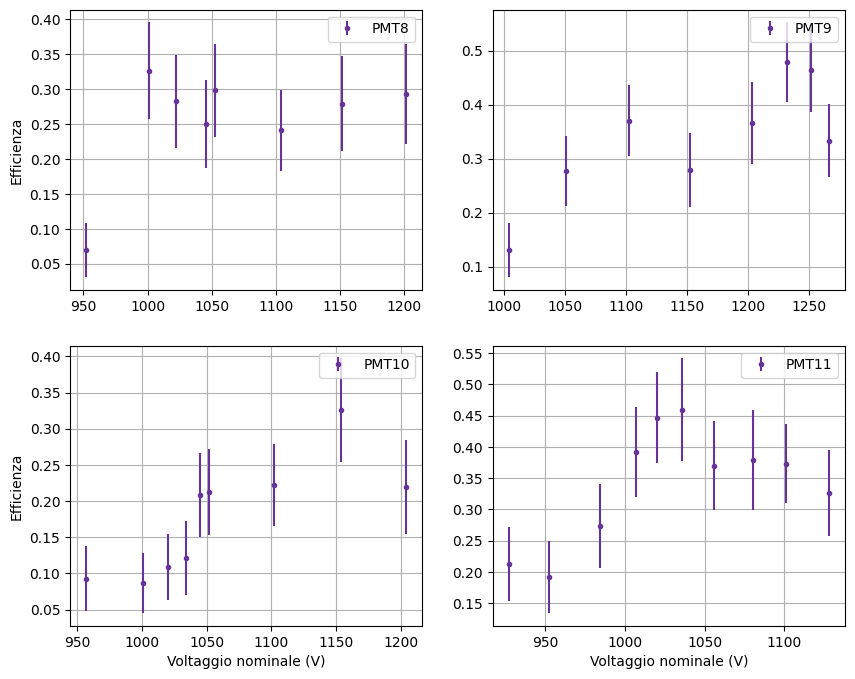

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].errorbar(V_8,eff_8,error_eff8, fmt='.', color='rebeccapurple',label='PMT8')
axs[0, 0].set_ylabel('Efficienza')
axs[0, 0].grid(True)
axs[0, 0].legend()

axs[0, 1].errorbar(V_9[1:],eff_9[1:],error_eff9[1:], fmt='.', color='rebeccapurple', label='PMT9')
axs[0, 1].grid(True)
axs[0, 1].legend()

axs[1, 0].errorbar(V_10,eff_10,error_eff10, fmt='.', color='rebeccapurple', label='PMT10')
axs[1, 0].set_ylabel('Efficienza')
axs[1, 0].set_xlabel('Voltaggio nominale (V)')
axs[1, 0].grid(True)
axs[1, 0].legend()

axs[1, 1].errorbar(V_11[2:],eff_11[2:],error_eff11[2:], fmt='.', color='rebeccapurple', label='PMT11')
axs[1, 1].set_xlabel('Voltaggio nominale (V)')
axs[1, 1].grid(True)
axs[1, 1].legend()
plt.show()

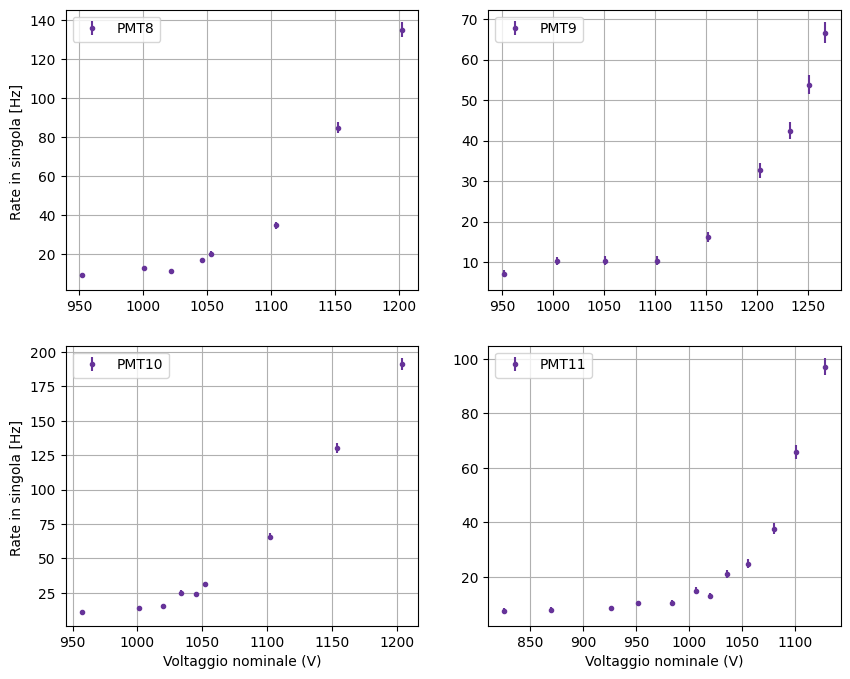

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].errorbar(V_8,rate8,errorrate8, fmt='.', color='rebeccapurple',label='PMT8')
axs[0, 0].set_ylabel('Rate in singola [Hz] ')
axs[0, 0].grid(True)
axs[0, 0].legend()

axs[0, 1].errorbar(V_9,rate9,errorrate9, fmt='.', color='rebeccapurple',label='PMT9')
axs[0, 1].grid(True)
axs[0, 1].legend()

axs[1, 0].errorbar(V_10,rate10,errorrate10, fmt='.', color='rebeccapurple',label='PMT10')
axs[1, 0].set_ylabel('Rate in singola [Hz] ')
axs[1, 0].set_xlabel('Voltaggio nominale (V)')
axs[1, 0].grid(True)
axs[1, 0].legend()

axs[1, 1].errorbar(V_11,rate11,errorrate11, fmt='.', color='rebeccapurple',label='PMT11')
axs[1, 1].set_xlabel('Voltaggio nominale (V)')
axs[1, 1].grid(True)
axs[1, 1].legend()
plt.show()


## Curve efficienza scintillatori plastici (raw, previous data)

in questo caso mettiamo che l'errore sul voltaggio sia di circa 1 V perché è scelto da GeCo ed oscilla un po'

In [51]:
time=10 #s
len_segnale=25e-9
#PMT3 voltaggio: 1770 V (vedi poi in singola) 
#PMT4 voltaggio: 1700 V

In [52]:
V= np.array([1600, 1650, 1700, 1750, 1800])

triple_1= np.array([9, 13, 12, 20, 33])
triple_2 =np.array([4, 16, 22, 41, 62])
#triple_5=np.array([69, 114, 73, 52, 30])
triple_5=np.array([83, 102, 64, 33, 21])
triple_7 =np.array([1, 14, 34, 48, 66])
doppie_3_4= np.array([152, 183, 154, 153, 193])

counts_1= np.array([183, 475, 915, 2084, 39783])
counts_2= np.array([22, 87, 155, 313, 558])
counts_5=np.array([371, 737, 1276, 2335, 7804])
counts_7=np.array([16, 68, 223, 917, 2063])

In [53]:
#PMT5 voltaggio: 1750 V 
#PMT7 voltaggio: 1750 V
triple_3=np.array([0, 8, 23, 45, 48])
triple_4=np.array([21, 71, 89, 83, 81])
doppie_5_7=np.array([111, 131, 122, 118, 117])
counts_3=np.array([114, 71, 188, 530, 1074])
counts_4=np.array([102, 544, 1390, 13347, 846045])

In [54]:
rate1=counts_1/time
rate2=counts_2/time
rate3=counts_3/time
rate4=counts_4/time
rate5=counts_5/time
rate7=counts_7/time

errorrate1=np.sqrt(counts_1)/time
errorrate2=np.sqrt(counts_2)/time
errorrate3=np.sqrt(counts_3)/time
errorrate4=np.sqrt(counts_4)/time
errorrate5=np.sqrt(counts_5)/time
errorrate7=np.sqrt(counts_7)/time

error3_4=np.sqrt(doppie_3_4)
error5_7=np.sqrt(doppie_5_7)

error1=np.sqrt(triple_1)
error2=np.sqrt(triple_2)
error3=np.sqrt(triple_3)
error4=np.sqrt(triple_4)
error5=np.sqrt(triple_5)
error7=np.sqrt(triple_7)

In [55]:
counts_acc= 743*1973*(2*len_segnale-2*2e-9)/10 #coincidenza minima di 2ns
sigma_counts_acc=np.sqrt((np.sqrt(743)*1973)**2+(743*np.sqrt(1973))**2)*(2*len_segnale-2*2e-9)/10
print("Rate accidentali 34:", counts_acc/10)

counts_acc_triple=counts_acc*2318*(2*len_segnale-2*2e-9)/10
print("Rate accidentali triple 347:", counts_acc_triple/10)

counts_acc1= 2335*917*(2*len_segnale-2*2e-9)/10 #coincidenza minima di 2ns
sigma_counts_acc1=np.sqrt((np.sqrt(2335)*917)**2+(2335*np.sqrt(917))**2)*(2*len_segnale-2*2e-9)/10

eff_1=triple_1/(doppie_3_4-counts_acc)
error_eff1=sigma_eff(triple_1, doppie_3_4, counts_acc, sigma_counts_acc)
print(f"Eff 1 {eff_1} errore: {error_eff1}")
eff_2=triple_2/(doppie_3_4-counts_acc)
error_eff2=sigma_eff(triple_2, doppie_3_4, counts_acc, sigma_counts_acc)
print(f"Eff 2 {eff_2} errore: {error_eff2}")

eff_3=triple_3/(doppie_5_7-counts_acc)
error_eff3=sigma_eff(triple_3, doppie_5_7, counts_acc1, sigma_counts_acc1)
print(f"Eff 3 {eff_3} errore: {error_eff3}")
eff_4=triple_4/(doppie_5_7-counts_acc)
error_eff4=sigma_eff(triple_4, doppie_5_7, counts_acc1, sigma_counts_acc1)
print(f"Eff 4 {eff_4} errore: {error_eff4}")

eff_5=triple_5/(doppie_3_4-counts_acc)
error_eff5=sigma_eff(triple_5, doppie_3_4, counts_acc, sigma_counts_acc)
eff_7=triple_7/(doppie_3_4-counts_acc)
error_eff7=sigma_eff(triple_7, doppie_3_4, counts_acc, sigma_counts_acc)
print(f"Eff 7 {eff_7} errore: {error_eff7}")

Rate accidentali 34: 0.0006743319399999998
Rate accidentali triple 347: 7.190266609831999e-09
Eff 1 [0.05921315 0.07104087 0.07792549 0.13072472 0.17099043] errore: [0.01914486 0.01899078 0.02160138 0.02725404 0.02710205]
Eff 2 [0.02631696 0.08743492 0.1428634  0.26798567 0.32125475] errore: [0.01298447 0.02088165 0.02819968 0.03580874 0.03361357]
Eff 3 [0.         0.06107185 0.18853501 0.38137773 0.41028006] errore: [0.         0.0209237  0.03541525 0.04471857 0.04547875]
Eff 4 [0.18920068 0.54201263 0.72954852 0.70343003 0.6923476 ] errore: [0.03717917 0.04353389 0.04021773 0.04204956 0.04267059]
Eff 7 [0.00657924 0.07650555 0.22078889 0.31373932 0.34198086] errore: [0.00655771 0.01964962 0.03342526 0.03751478 0.03414732]


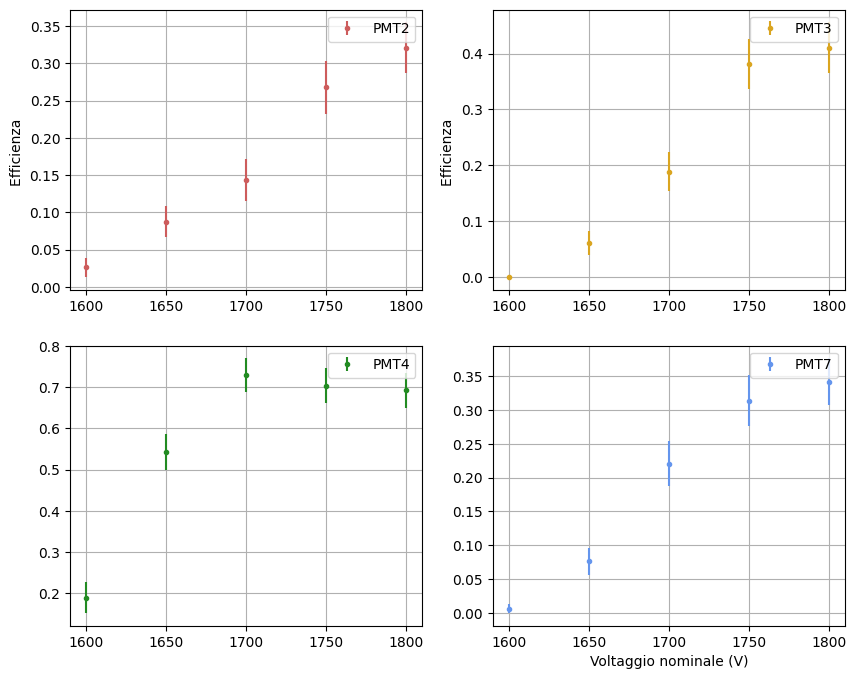

In [56]:
plt.figure(figsize=(10,8))
plt.tight_layout
#plt.title('Efficienza fotomoltiplicatori degli scintillatori plastici')

plt.subplot(2,2,1)
plt.errorbar(V,eff_2,error_eff2, fmt='.', color='indianred', label='PMT2')
plt.ylabel('Efficienza ')
plt.grid(True)
plt.legend()

plt.subplot(2,2,2)
plt.errorbar(V,eff_3,error_eff3, fmt='.', color='goldenrod', label='PMT3')
plt.ylabel('Efficienza ')
plt.grid(True)
plt.legend()

plt.subplot(2,2,3)
plt.errorbar(V,eff_4,error_eff4, fmt='.', color='forestgreen', label='PMT4')
plt.grid(True)
plt.legend()

plt.subplot(2,2,4)
plt.errorbar(V,eff_7,error_eff7, fmt='.', color='cornflowerblue',label='PMT7')
plt.xlabel('Voltaggio nominale (V)')
plt.grid(True)
plt.legend()
plt.show()

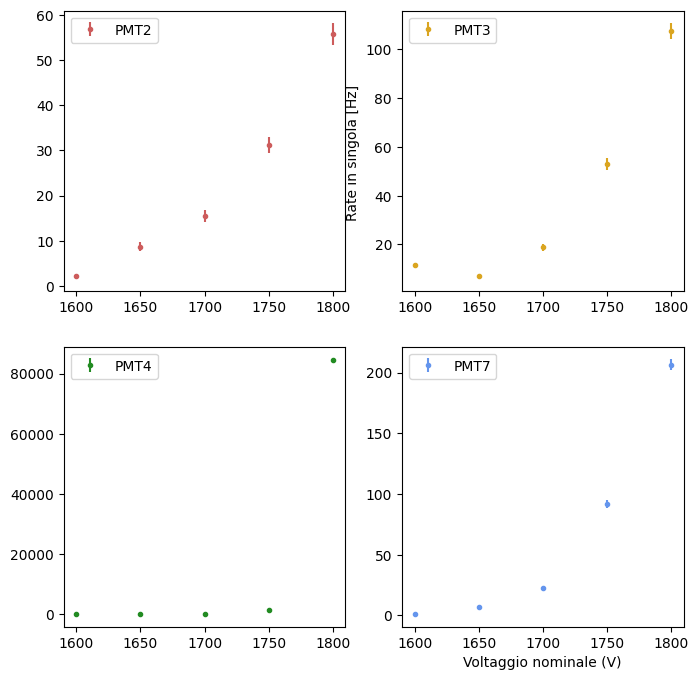

In [57]:
plt.figure(figsize=(8,8))
plt.tight_layout
#plt.title("Rate in singola degli scintillatori")

plt.subplot(221)
plt.errorbar(V,rate2,errorrate2, fmt='.', color='indianred',label='PMT2')
plt.legend()

plt.subplot(222)
plt.errorbar(V,rate3,errorrate3, fmt='.', color='goldenrod',label='PMT3')
plt.ylabel('Rate in singola [Hz] ')
plt.legend()

plt.subplot(223)
plt.errorbar(V,rate4,errorrate4, fmt='.', color='forestgreen',label='PMT4')
plt.legend()

plt.subplot(224)
plt.errorbar(V,rate7,errorrate7, fmt='.', color='cornflowerblue',label='PMT7')
plt.xlabel('Voltaggio nominale (V)')
plt.legend()

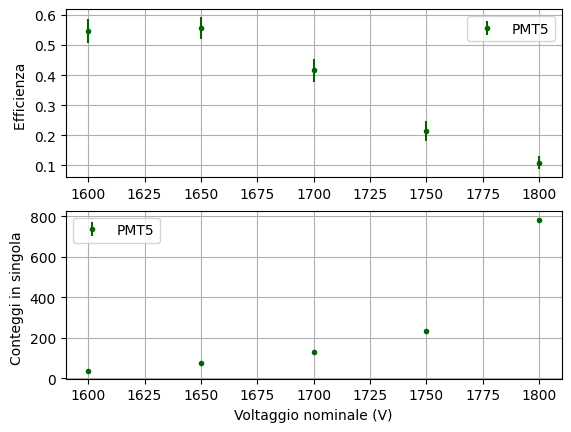

In [38]:
#qui inserire i grafici del PMT5

plt.subplot(2,1,1)
plt.errorbar(V,eff_5,error_eff5, fmt='.', color='darkgreen', label='PMT5')
plt.ylabel('Efficienza ')
plt.grid(True)
plt.legend()

plt.subplot(2,1,2)
plt.errorbar(V,rate5,errorrate5, fmt='.', color='darkgreen',label='PMT5')
plt.xlabel('Voltaggio nominale (V)')
plt.ylabel('Conteggi in singola ')
plt.grid(True)
plt.legend()
plt.show()

### PMT 1 Veto dello start

In [39]:
time=20 #s
len_segnale=25e-9
#PMT2 voltaggio: 1750 V (vedi poi in singola) 
#PMT7 voltaggio: 1750 V

V= np.array([1580, 1550, 1590,1600, 1650, 1700, 1730, 1750, 1780, 1800])
triple_1= np.array([1, 0, 4, 7, 5, 5, 5, 5,10, 8])
doppie_2_7= np.array([1509, 1391, 1536, 1546, 1515, 1451, 1530, 1474, 1478, 1410])
counts_1= np.array([151, 79, 198, 219, 607, 1370, 2097, 2814, 4448, 10543])

In [40]:
rate1=counts_1/time
errorrate1=np.sqrt(counts_1)/time

counts_acc= 420*1112*(2*len_segnale-2*2e-9)/10 #coincidenza minima di 2ns
sigma_counts_acc=np.sqrt((np.sqrt(420)*1112)**2+(420*np.sqrt(1112))**2)*(2*len_segnale-2*2e-9)/20
print("Rate accidentali 27:", counts_acc/20)

eff_1=triple_1/(doppie_2_7-counts_acc)
error_eff1=sigma_eff(triple_1, doppie_2_7, counts_acc, sigma_counts_acc)
print(f"Eff 1 {eff_1} errore: {error_eff1}")

Rate accidentali 27: 0.00010741919999999998
Eff 1 [0.00066269 0.         0.00260417 0.00452782 0.00330033 0.0034459
 0.00326798 0.00339214 0.00676591 0.00567377] errore: [0.00066247 0.         0.00130039 0.00170748 0.00147352 0.0015384
 0.0014591  0.00151443 0.00213232 0.00200028]


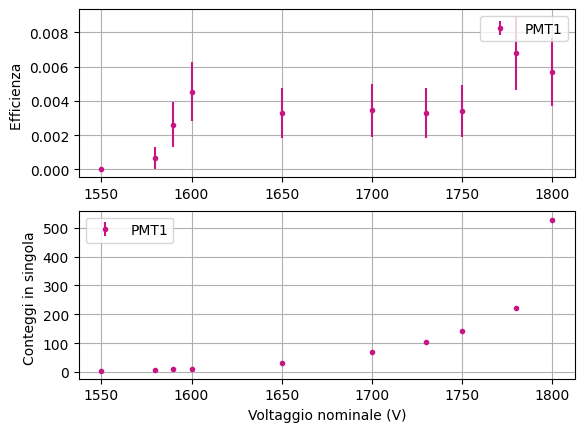

In [41]:
plt.subplot(2,1,1)
plt.errorbar(V,eff_1,error_eff1, fmt='.', color='mediumvioletred', label='PMT1')
plt.ylabel('Efficienza ')
plt.grid(True)
plt.legend()

plt.subplot(2,1,2)
plt.errorbar(V,rate1,errorrate1, fmt='.', color='mediumvioletred',label='PMT1')
plt.xlabel('Voltaggio nominale (V)')
plt.ylabel('Conteggi in singola ')
plt.grid(True)
plt.legend()
plt.show()

In [42]:
time=10 #s
len_segnale=25e-9
#PMT2 voltaggio: 1750 V (vedi poi in singola) 
#PMT7 voltaggio: 1750 V

V= np.array([1600, 1650, 1700, 1750, 1800])
triple_1= np.array([9, 13, 12, 20, 33])
doppie_2_7= np.array([152, 183, 154, 153, 193 ])
counts_1= np.array([183, 475, 915, 2084, 39783])

In [43]:
rate1=counts_1/time
errorrate1=np.sqrt(counts_1)/time

counts_acc= 420*1112*(2*len_segnale-2*2e-9)/10 #coincidenza minima di 2ns
sigma_counts_acc=np.sqrt((np.sqrt(420)*1112)**2+(420*np.sqrt(1112))**2)*(2*len_segnale-2*2e-9)/10
print("Rate accidentali 27:", counts_acc/10)

eff_1=triple_1/(doppie_2_7-counts_acc)
error_eff1=sigma_eff(triple_1, doppie_2_7, counts_acc, sigma_counts_acc)
print(f"Eff 1 {eff_1} errore: {error_eff1}")

Rate accidentali 27: 0.00021483839999999997
Eff 1 [0.05921136 0.07103909 0.07792316 0.13072079 0.17098636] errore: [0.01914401 0.01899009 0.02160044 0.02725288 0.02710115]


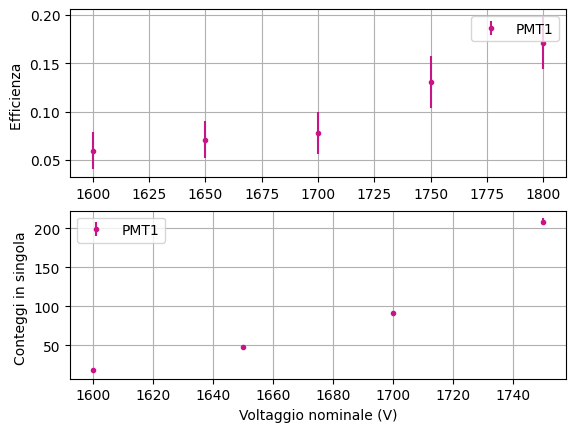

In [44]:
plt.subplot(2,1,1)
plt.errorbar(V,eff_1,error_eff1, fmt='.', color='mediumvioletred', label='PMT1')
plt.ylabel('Efficienza ')
plt.grid(True)
plt.legend()

plt.subplot(2,1,2)
plt.errorbar(V[:-1],rate1[:-1],errorrate1[:-1], fmt='.', color='mediumvioletred',label='PMT1')
plt.xlabel('Voltaggio nominale (V)')
plt.ylabel('Conteggi in singola ')
plt.grid(True)
plt.legend()
plt.show()

## Grafico finale degli scintillatori

In [7]:
time=10 #s
len_segnale=25e-9
#PMT3 voltaggio: 1770 V (vedi poi in singola) 
#PMT4 voltaggio: 1700 V

V= np.array([1600, 1650, 1700, 1750, 1800])

triple_2 =np.array([4, 16, 22, 41, 62])
triple_7 =np.array([1, 14, 34, 48, 66])
doppie_3_4= np.array([152, 183, 154, 153, 193])
counts_2= np.array([22, 87, 155, 313, 558])
counts_7=np.array([16, 68, 223, 917, 2063])

#PMT5 voltaggio: 1750 V 
#PMT7 voltaggio: 1750 V
triple_3=np.array([0, 8, 23, 45, 48])
triple_4=np.array([21, 71, 89, 83, 81])
doppie_5_7=np.array([111, 131, 122, 118, 117])
counts_3=np.array([114, 71, 188, 530, 1074])
counts_4=np.array([102, 544, 1390, 13347, 86045])

V1= np.array([1500, 1550, 1580, 1600, 1630, 1650, 1680, 1700, 1720, 1750, 1770,1780, 1790, 1800])
triple_1=np.array([0,2,8,3,
                   8,7,13,12,7,
                   5,10,5,11,13])
doppie_2_7=np.array([33,26,38,25,
                     30,35,41,43,23,
                     28, 28,40,34,39])
counts_1=np.array([24,56,144,224,
                   381,549,878,1172,1590,
                   3777,15379,29699,53647,91080])

V2= np.array([1500, 1550, 1600, 1650, 1700, 1720,1750,1780, 1800])
print(len(V2))
triple_5=np.array([6,15,18,21,17,
                   32,13,18,20])
doppie_2_7_5=np.array([23,28,24,22,17,
                       36,21,27,35])
counts_5=np.array([73,209,526,948,1919,
                   2522,5823,11418,15004])


9


In [8]:
rate1=counts_1/time
rate2=counts_2/time
rate3=counts_3/time
rate4=counts_4/time
rate5=counts_5/time
rate7=counts_7/time

errorrate1=np.sqrt(counts_1)/time
errorrate2=np.sqrt(counts_2)/time
errorrate3=np.sqrt(counts_3)/time
errorrate4=np.sqrt(counts_4)/time
errorrate5=np.sqrt(counts_5)/time
errorrate7=np.sqrt(counts_7)/time

print(f"Rate 1 {rate1} errore: {errorrate1}")
print(f"Rate  2 {rate2} errore: {errorrate2}")
print(f"Rate  4 {rate4} errore: {errorrate4}")
print(f"Rate  7 {rate7} errore: {errorrate7}")

error3_4=np.sqrt(doppie_3_4)
error5_7=np.sqrt(doppie_5_7)

error1=np.sqrt(triple_1)
error2=np.sqrt(triple_2)
error3=np.sqrt(triple_3)
error4=np.sqrt(triple_4)
error5=np.sqrt(triple_5)
error7=np.sqrt(triple_7)

Rate 1 [2.4000e+00 5.6000e+00 1.4400e+01 2.2400e+01 3.8100e+01 5.4900e+01
 8.7800e+01 1.1720e+02 1.5900e+02 3.7770e+02 1.5379e+03 2.9699e+03
 5.3647e+03 9.1080e+03] errore: [ 0.48989795  0.74833148  1.2         1.49666295  1.95192213  2.3430749
  2.96310648  3.42344855  3.98748041  6.14573023 12.40120962 17.23339781
 23.16182204 30.17946322]
Rate  2 [ 2.2  8.7 15.5 31.3 55.8] errore: [0.46904158 0.93273791 1.24498996 1.7691806  2.36220236]
Rate  4 [  10.2   54.4  139.  1334.7 8604.5] errore: [ 1.00995049  2.33238076  3.72827038 11.55292171 29.33342803]
Rate  7 [  1.6   6.8  22.3  91.7 206.3] errore: [0.4        0.82462113 1.49331845 3.02820079 4.54202598]


In [9]:
counts_acc= 743*1973*(2*len_segnale-2*2e-9)/10 #coincidenza minima di 2ns
sigma_counts_acc=np.sqrt((np.sqrt(743)*1973)**2+(743*np.sqrt(1973))**2)*(2*len_segnale-2*2e-9)/10
print("Rate accidentali 34:", counts_acc/10)

counts_acc1= 333*2318*(2*len_segnale-2*2e-9)/10 #coincidenza minima di 2ns
sigma_counts_acc1=np.sqrt((np.sqrt(333)*2318)**2+(333*np.sqrt(2318))**2)*(2*len_segnale-2*2e-9)/10
print("Rate accidentali 27:", counts_acc1/10)

counts_acc2= 2335*917*(2*len_segnale-2*2e-9)/10 #coincidenza minima di 2ns
sigma_counts_acc2=np.sqrt((np.sqrt(2335)*917)**2+(2335*np.sqrt(917))**2)*(2*len_segnale-2*2e-9)/10
print("Rate accidentali 57:", counts_acc2/10)

Rate accidentali 34: 0.0006743319399999998
Rate accidentali 27: 0.00035507123999999995
Rate accidentali 57: 0.0009849497


In [10]:
eff_1=triple_1/(doppie_2_7-counts_acc1)
error_eff1=sigma_eff(triple_1, doppie_2_7, counts_acc1, sigma_counts_acc1)
print(f"Eff 1 {eff_1} errore: {error_eff1}")
eff_2=triple_2/(doppie_3_4-counts_acc)
error_eff2=sigma_eff(triple_2, doppie_3_4, counts_acc, sigma_counts_acc)
print(f"Eff 2 {eff_2} errore: {error_eff2}")

eff_3=triple_3/(doppie_5_7-counts_acc2)
error_eff3=sigma_eff(triple_3, doppie_5_7, counts_acc2, sigma_counts_acc2)
print(f"Eff 3 {eff_3} errore: {error_eff3}")
eff_4=triple_4/(doppie_5_7-counts_acc2)
error_eff4=sigma_eff(triple_4, doppie_5_7, counts_acc2, sigma_counts_acc2)
print(f"Eff 4 {eff_4} errore: {error_eff4}")

eff_5=triple_5/(doppie_2_7_5-counts_acc1)
error_eff5=sigma_eff(triple_5, doppie_2_7_5, counts_acc1, sigma_counts_acc1)
print(f"Eff 5 {eff_5} errore: {error_eff5}")

print(len(eff_5))

eff_7=triple_7/(doppie_3_4-counts_acc)
error_eff7=sigma_eff(triple_7, doppie_3_4, counts_acc, sigma_counts_acc)
print(f"Eff 7 {eff_7} errore: {error_eff7}")

Eff 1 [0.         0.07693358 0.21054599 0.12001705 0.26669823 0.20002029
 0.31710063 0.27909281 0.30439482 0.17859408 0.35718815 0.1250111
 0.3235632  0.33336368] errore: [0.         0.05226935 0.06614327 0.06500553 0.08074994 0.06762177
 0.07268128 0.06840938 0.09596286 0.07239165 0.09056628 0.05229788
 0.08024151 0.07549373]
Eff 2 [0.02631696 0.08743492 0.1428634  0.26798567 0.32125475] errore: [0.01298447 0.02088165 0.02819968 0.03580874 0.03361357]
Eff 3 [0.         0.06107329 0.18853981 0.38138777 0.41029095] errore: [0.         0.0209237  0.03541525 0.04471857 0.04547875]
Eff 4 [0.18920598 0.54202549 0.7295671  0.70344855 0.69236598] errore: [0.03717917 0.04353389 0.04021773 0.04204956 0.04267059]
Eff 5 [0.26090984 0.53578223 0.75011098 0.95469954 1.00020891 0.88897657
 0.61915231 0.66675435 0.57148655] errore: [0.09157925 0.09426079 0.08838834 0.04434487        nan 0.05236536
 0.10598349 0.09072781 0.08365565]
9
Eff 7 [0.00657924 0.07650555 0.22078889 0.31373932 0.34198086] erro

/tmp/ipykernel_69441/3399165630.py:3: RuntimeWarning: invalid value encountered in sqrt
  sigma_nt=np.sqrt(nd*epsilon*(1-epsilon))


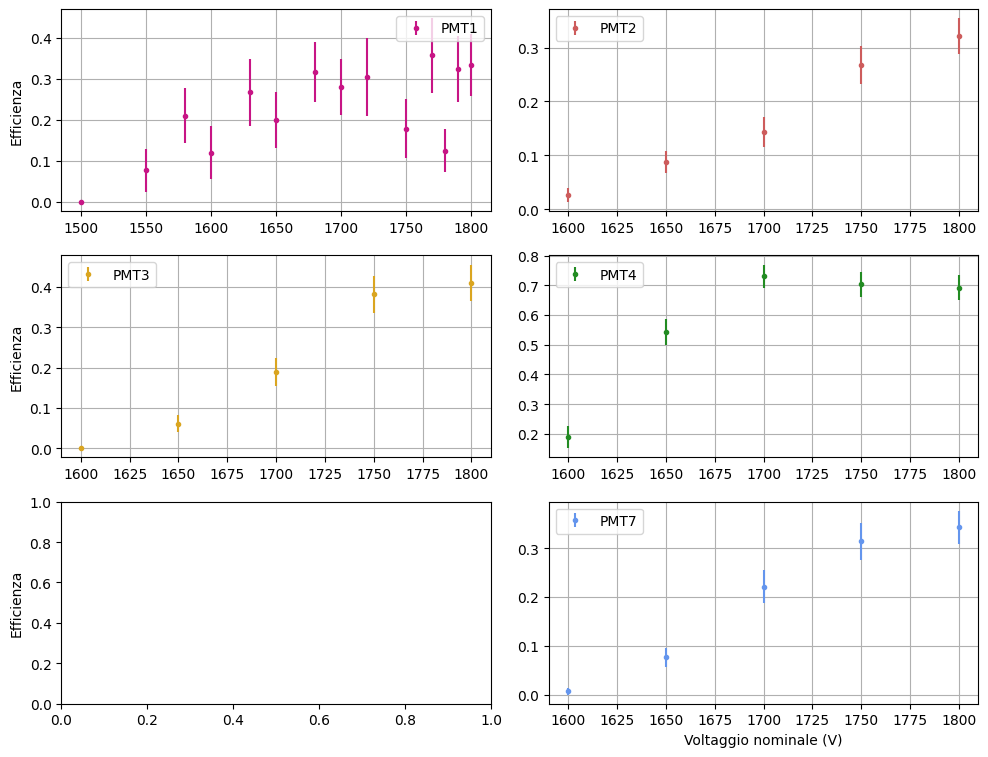

In [11]:
fig, axs = plt.subplots(3, 2, figsize=(10, 8))

axs[0, 0].errorbar(V1, eff_1, error_eff1, fmt='.', color='mediumvioletred', label='PMT1')
axs[0, 0].set_ylabel('Efficienza')
axs[0, 0].grid(True)
axs[0, 0].legend()

axs[0, 1].errorbar(V, eff_2, error_eff2, fmt='.', color='indianred', label='PMT2')
axs[0, 1].grid(True)
axs[0, 1].legend()

axs[1, 0].errorbar(V, eff_3, error_eff3, fmt='.', color='goldenrod', label='PMT3')
axs[1, 0].set_ylabel('Efficienza')
axs[1, 0].grid(True)
axs[1, 0].legend()

axs[1, 1].errorbar(V, eff_4, error_eff4, fmt='.', color='forestgreen', label='PMT4')
axs[1, 1].grid(True)
axs[1, 1].legend()

axs[2, 1].errorbar(V, eff_7, error_eff7, fmt='.', color='cornflowerblue', label='PMT7')
axs[2, 1].set_xlabel('Voltaggio nominale (V)')
axs[2, 0].set_ylabel('Efficienza')
axs[2, 1].grid(True)
axs[2, 1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

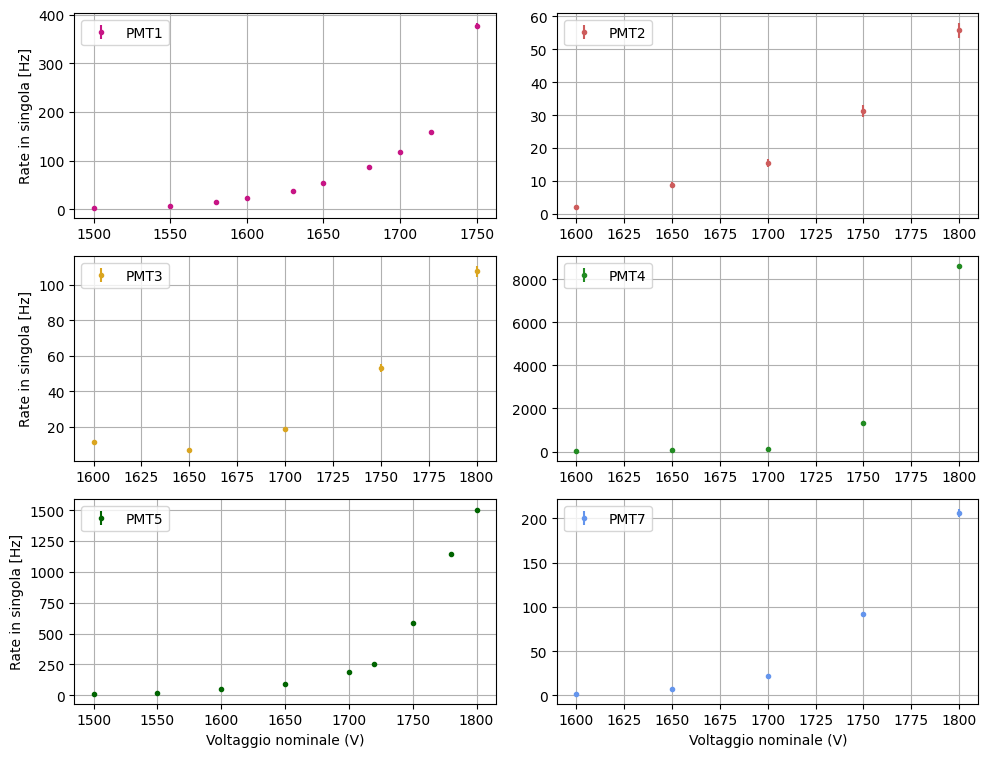

In [13]:
fig, axs = plt.subplots(3, 2, figsize=(10, 8))

axs[0, 0].errorbar(V1[:10], rate1[:10], errorrate1[:10], fmt='.', color='mediumvioletred', label='PMT1')
axs[0, 0].set_ylabel('Rate in singola [Hz]')
axs[0, 0].grid(True)
axs[0, 0].legend()

axs[0, 1].errorbar(V, rate2, errorrate2, fmt='.', color='indianred', label='PMT2')
axs[0, 1].grid(True)
axs[0, 1].legend()

axs[1, 0].errorbar(V, rate3, errorrate3, fmt='.', color='goldenrod', label='PMT3')
axs[1, 0].set_ylabel('Rate in singola [Hz]')
axs[1, 0].grid(True)
axs[1, 0].legend()

axs[1, 1].errorbar(V, rate4, errorrate4, fmt='.', color='forestgreen', label='PMT4')
axs[1, 1].grid(True)
axs[1, 1].legend()

axs[2, 0].errorbar(V2, rate5, errorrate5, fmt='.', color='darkgreen', label='PMT5')
axs[2, 0].set_xlabel('Voltaggio nominale (V)')
axs[2, 0].set_ylabel('Rate in singola [Hz]')
axs[2, 0].grid(True)
axs[2, 0].legend()

axs[2, 1].errorbar(V, rate7, errorrate7, fmt='.', color='cornflowerblue', label='PMT7')
axs[2, 1].set_xlabel('Voltaggio nominale (V)')
axs[2, 1].grid(True)
axs[2, 1].legend()
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()